In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\msona\\OneDrive\\Desktop\\companies\\companies.csv')

In [4]:
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
data.shape

(196553, 44)

In [6]:
data.tail()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN
196552,c:9998,196552,Company,9998,NaN,Closet Couture,closet couture,/company/closet-couture,ecommerce,operating,...,2006-07-01,2008-09-10,2.0,1.0,NaN,2008-08-24 16:46:13,2013-03-23 12:01:50,34.035633,-118.515590,NaN


In [7]:
data.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [8]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

#  Data Cleaning

# Delete Irrelevant and redundant information.

Delete "region", "city", and "state_code" as they provide to much granularity.#

In [9]:
columns_to_drop = ["region", "city", "state_code"]
data.drop(columns_to_drop, inplace=True, axis=1)

#Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.#

In [10]:
columns_to_drop = ['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at']
data.drop(columns_to_drop, inplace=True, axis=1)

# Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.#

In [11]:
columns_to_drop = ['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies']
data.drop(columns_to_drop, inplace=True, axis=1)

In [12]:
data.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')

# Delete duplicate values if found any.

In [13]:
# Checking for duplicates
data.loc[data.duplicated(keep="first"), :]

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
79,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
114,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
132,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196533,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196534,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196535,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196536,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Getting total number of duplicates
data.duplicated().sum()

87089

In [15]:
# Dropping duplicates from dataset
# data.drop_duplicates(keep="first", inplace=True)
# data.shape

# Creating a custom transformer for duplication removal in dataset
class DuplicatesRemover(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_without_duplicates = X.drop_duplicates(keep="first")
        return X_without_duplicates
    
duplicates_remover = DuplicatesRemover()
data = duplicates_remover.fit_transform(data)
data.shape

(109464, 19)

In [16]:
data.duplicated().sum()

0

# Delete those which has more than 98% of null values

In [17]:
# Getting null value percentage for each column
columns_null_percentages = (data.isnull().sum() / len(data.index)) * 100
columns_null_percentages

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64

In [18]:
# Extracting columns with more than threshold percentage
columns_to_drop = list(data.loc[:, columns_null_percentages >= 98].columns.values)
columns_to_drop

['ROI']

In [19]:
# Dropping columns with more than threshold percentage
data.drop(columns_to_drop, inplace=True, axis=1)

In [20]:
data.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

# Remove noise or unreliable data (missing values and outliers)

In [21]:
#Calculating percentage of missing values in dataset

In [22]:
# Function to get percentage of missing data in whole dataset
def get_missing_values_percentage(data_frame):
    missing_values_count = data.isnull().sum()
    total_values = np.product(data.shape)
    total_missing_values = missing_values_count.sum()
    return (total_missing_values / total_values) * 100

In [23]:
get_missing_values_percentage(data)

53.75039586835245

In [24]:
#Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [25]:
# Checking number of null values for target columns
target_columns = ["status", "founded_at"]
data[target_columns].isnull().sum()

status            0
founded_at    26913
dtype: int64

In [26]:
# Dropping null values from target columns
data.dropna(subset=target_columns, inplace=True)

In [27]:
data[target_columns].isnull().sum()

status        0
founded_at    0
dtype: int64

In [28]:
data.shape

(82551, 18)

# Delete outliers for 'funding_total_usd' and 'funding_rounds'

In [29]:
# sns.boxplot(x=data["funding_total_usd"])

In [30]:
# sns.boxplot(x=data["funding_rounds"])

In [31]:
# Function to remove outliers for a given column (feature)
def remove_outliers(data_frame, feature):
    q1 = data_frame[feature].quantile(0.25)
    q3 = data_frame[feature].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return data_frame.loc[(data[feature] > lower_limit) & (data[feature] < upper_limit)]

In [32]:
# Removing outliers for columns "funding_total_usd" and "funding_rounds"
data = remove_outliers(data, "funding_total_usd")
data = remove_outliers(data, "funding_rounds")

In [33]:
# sns.boxplot(x=data["funding_total_usd"])

In [34]:
# sns.boxplot(x=data["funding_rounds"])

In [35]:
data.shape

(18026, 18)

In [36]:
get_missing_values_percentage(data)

30.729994945572447

# Date Transformation

In [37]:
#Changes in original data

In [38]:
#Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at, first_investment_at, last_investment_at to years.¶

In [39]:
# Function to extract year from date for a given column (feature)
def extract_year(data, feature):
    return pd.to_datetime(data[feature], format="%Y-%m-%d").dt.year

In [40]:
# Converting target columns dates to year only
target_columns = ["founded_at", "closed_at", "first_funding_at", "last_funding_at", "first_milestone_at" , "last_milestone_at", "first_investment_at", "last_investment_at"]
for column in target_columns:
    data[column] = extract_year(data, column)
data.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003,NaN,AUS,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.0,-27.469771,153.025124
32,education,operating,2010,NaN,USA,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,NaN,NaN,NaN
36,medical,operating,2006,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007821


In [41]:
data.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003,NaN,AUS,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.0,-27.469771,153.025124
32,education,operating,2010,NaN,USA,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,NaN,NaN,NaN
36,medical,operating,2006,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007821


In [42]:
# Plotting count of companies with their starting year
# plt.figure(figsize=(10, 15))
# sns.countplot(y=data["founded_at"])

# Generalize the categorical data i.e. category_code and country_code

In [43]:
# Unique values in "category_code" column
data["category_code"].unique()

array(['web', 'cleantech', 'mobile', 'education', 'medical',
       'games_video', 'enterprise', 'software', 'analytics', 'news',
       'government', 'ecommerce', 'other', 'security', 'biotech',
       'network_hosting', 'finance', 'advertising', 'photo_video',
       'travel', 'social', 'transportation', 'hospitality', 'health',
       'manufacturing', 'sports', 'nonprofit', 'search', 'fashion',
       'messaging', 'hardware', 'public_relations', 'consulting', 'music',
       'legal', nan, 'real_estate', 'automotive', 'design', 'pets',
       'semiconductor', 'local', 'nanotech'], dtype=object)

In [44]:
# Number of unique values in "category_code" column
#data["category_code"].nunique()

In [45]:
# Extacting top 15 frequent categories
top_15 = list(data["category_code"].value_counts().sort_values(ascending=False).head(15).index)
top_15

['software',
 'web',
 'biotech',
 'mobile',
 'ecommerce',
 'enterprise',
 'games_video',
 'advertising',
 'hardware',
 'analytics',
 'social',
 'cleantech',
 'health',
 'other',
 'education']

In [46]:
# Keep category same if it is in top 15, change to "other" otherwise
data.loc[~data["category_code"].isin(top_15), "category_code"] = "other"

# Total unique values left after processing
data["category_code"].nunique()

15

In [47]:
# Plotting count of companies working on different categories
# plt.figure(figsize=(8, 8))
# sns.countplot(y=data['category_code'], label="Count")

In [48]:
# Unique values in "country_code" column
data["country_code"].unique()

array(['USA', 'AUS', 'FRA', 'GBR', 'SWE', 'DEU', 'JPN', 'FIN', 'RUS',
       'MEX', 'ISL', nan, 'CAN', 'CHE', 'ISR', 'TUR', 'NOR', 'CHN', 'ZAF',
       'MYS', 'SVK', 'ESP', 'IND', 'ARG', 'TWN', 'KOR', 'DNK', 'IRL',
       'CHL', 'LBN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'LUX', 'ROM',
       'NLD', 'CYM', 'UKR', 'AUT', 'IDN', 'POL', 'EGY', 'NZL', 'NGA',
       'CZE', 'HRV', 'ITA', 'HUN', 'HKG', 'CYP', 'GRC', 'NPL', 'BRA',
       'BGR', 'JOR', 'PST', 'REU', 'ARE', 'THA', 'PAK', 'BHS', 'GEO',
       'PAN', 'BGD', 'URY', 'GTM', 'LTU', 'COL', 'ANT', 'GHA', 'SYC',
       'MAR', 'CRI', 'BLR', 'MLT', 'SVN', 'VEN', 'VNM', 'UGA', 'ALB',
       'CSS', 'LVA', 'PER', 'GLP', 'DOM', 'KEN', 'ECU', 'UZB', 'MMR',
       'BHR', 'SMR', 'AZE', 'PRK', 'MKD', 'NRU', 'SWZ', 'SEN', 'FST',
       'BMU', 'MCO', 'GIB', 'TUN', 'CMR', 'SAU', 'SOM', 'SLV', 'BRB'],
      dtype=object)

In [49]:
# Number of unique values in "country_code" column
data["country_code"].nunique()

108

In [50]:
# Extacting top 10 frequent categories
top_10 = list(data["country_code"].value_counts().sort_values(ascending=False).head(10).index)
top_10

['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'DEU', 'IND', 'ESP', 'AUS', 'IRL']

In [51]:
# Keep category same if it is in top 15, change to "other" otherwise
data.loc[~data["country_code"].isin(top_10), "country_code"] = "other"

# Total unique values left after processing
data["country_code"].nunique()

11

In [52]:
# Plotting count of companies from different regions
# plt.figure(figsize=(8, 8))
# sns.countplot(y=data['country_code'], label="Count")

In [53]:
# Creating one hot encoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Setting target columns
target_columns = ["category_code", "country_code"]

# Applying one hot encoding to each target column
one_hot_columns = pd.DataFrame(one_hot_encoder.fit_transform(data[target_columns]))

# One hot encoding remove index, putting it back
one_hot_columns.index = data.index

# Updating names of one hot encoded columns
array = ["category_code_" + column for column in top_15]
array.extend(["country_code_" + column for column in top_10])
array.append("country_code_other")
one_hot_columns.columns = array

# Removing categorical columns (Will replace with one hot encoded columns)
numerical_data = data.drop(target_columns, axis=1)

# Adding one hot encoded columns to data
data = pd.concat([numerical_data, one_hot_columns], axis=1)
data.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_GBR,country_code_CAN,country_code_FRA,country_code_ISR,country_code_DEU,country_code_IND,country_code_ESP,country_code_AUS,country_code_IRL,country_code_other
13,acquired,2007,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,operating,2003,NaN,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,operating,2003,NaN,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,operating,2010,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,operating,2006,NaN,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
data.shape

(18026, 42)

# Create new variables

Create new feature isClosed from closed_at and status.# 

In [55]:
# Creating a new column "isClosed"
data["isClosed"] = ""

# Putting 1 is status is "operating" or "ipo"
data.loc[(data["status"] == "operating") | (data["status"] == "ipo"), "isClosed"] = 1

# Putting 0 if status is "closed" or "acquired"
data.loc[(data["status"] == "closed") | (data["status"] == "acquired"), "isClosed"] = 0
data.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_CAN,country_code_FRA,country_code_ISR,country_code_DEU,country_code_IND,country_code_ESP,country_code_AUS,country_code_IRL,country_code_other,isClosed
13,acquired,2007,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
20,operating,2003,NaN,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
26,operating,2003,NaN,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
32,operating,2010,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
36,operating,2006,NaN,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


Create active_days# 

In [56]:
data["active_days"] = ""

Replacing the values in closed_at column# 

In [57]:
data.loc[data["isClosed"] == 1, "closed_at"] = 2021
data.dropna(subset=["closed_at"], inplace=True)
data["closed_at"].unique()

array([2021., 2012., 2010., 2013., 2009., 2011., 2008., 2006., 2007.,
       2005., 1998., 2004., 1997., 2000.])

Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)# 

In [58]:
data["active_days"] = (data["closed_at"] - data["founded_at"]) * 365
data["active_days"]

20        6570.0
26        6570.0
32        4015.0
36        5475.0
41        5475.0
           ...  
196537    3650.0
196540    2190.0
196547    4745.0
196549    5110.0
196552    5110.0
Name: active_days, Length: 16633, dtype: float64

Then, delete the closed_at column.# 

In [59]:
data.drop("closed_at", axis=1,inplace=True)
data.head()

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,country_code_FRA,country_code_ISR,country_code_DEU,country_code_IND,country_code_ESP,country_code_AUS,country_code_IRL,country_code_other,isClosed,active_days
20,operating,2003,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6570.0
26,operating,2003,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6570.0
32,operating,2010,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4015.0
36,operating,2006,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5475.0
41,operating,2006,NaN,NaN,NaN,2007.0,2007.0,2.0,414840.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5475.0


In [60]:
data.shape

(16633, 43)

#  work on target variabe now.

In [61]:
# Plotting target variable
# plt.figure(figsize=(8, 8))
# sns.countplot(x=data["status"])

In [62]:
data["status"] = data["status"].map({"operating": 1, "ipo": 1, "acquired": 0, "closed": 0})
data["status"].unique()

array([1, 0], dtype=int64)

# Remove the null vaues with the mean value in 'Numerical Data'

In [63]:
imputer = SimpleImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data))
imputed_data.columns = data.columns
data = imputed_data
data.head()

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,country_code_FRA,country_code_ISR,country_code_DEU,country_code_IND,country_code_ESP,country_code_AUS,country_code_IRL,country_code_other,isClosed,active_days
0,1.0,2003.0,2009.958763,2011.350515,10.783505,2011.0,2012.0,3.0,10125293.0,2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6570.0
1,1.0,2003.0,2009.958763,2011.350515,10.783505,2003.0,2003.0,1.0,250000.0,2007.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
2,1.0,2010.0,2009.958763,2011.350515,10.783505,2011.0,2011.0,1.0,100000.0,2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4015.0
3,1.0,2006.0,2009.958763,2011.350515,10.783505,2011.0,2012.0,2.0,11300000.0,2010.443195,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5475.0
4,1.0,2006.0,2009.958763,2011.350515,10.783505,2007.0,2007.0,2.0,414840.0,2010.443195,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5475.0


In [64]:
get_missing_values_percentage(data)

0.0

<AxesSubplot:>

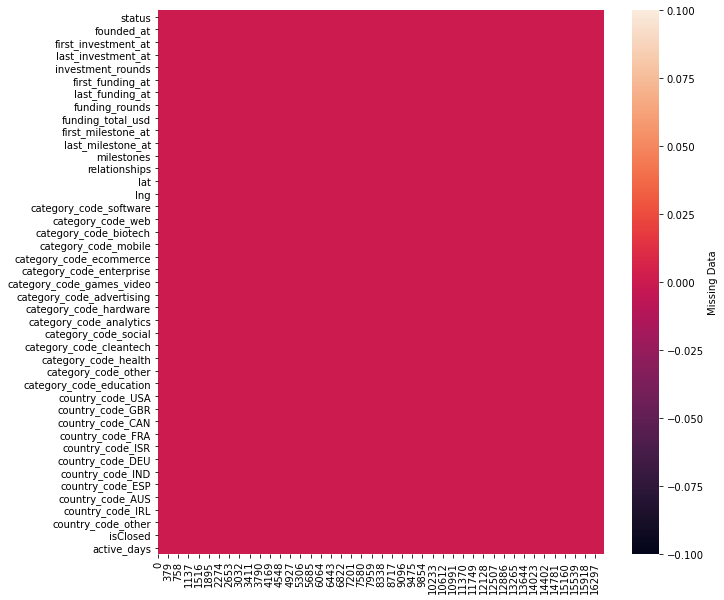

In [65]:
#Heatmap of missing values in data
#Ref: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10, 10))
sns.heatmap(data.isna().transpose(), cbar_kws={'label': 'Missing Data'})

 # Correlations

In [66]:
# plt.figure(figsize=(40, 40))
# sns.heatmap(data.corr(), annot=True)
# plt.show()

In [67]:
def correlation(data,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=data.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr  

corr_feature = correlation(data.iloc[:,:-1],0.90)
len(set(corr_feature))

1

In [68]:
corr_feature

{'isClosed'}

# DATA MODELING

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
data[['funding_rounds','funding_total_usd','milestones','relationships']] = scaler.fit_transform(data[['funding_rounds','funding_total_usd','milestones','relationships']])
data.head()

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,country_code_FRA,country_code_ISR,country_code_DEU,country_code_IND,country_code_ESP,country_code_AUS,country_code_IRL,country_code_other,isClosed,active_days
0,1.0,2003.0,2009.958763,2011.350515,10.783505,2011.0,2012.0,1.0,0.363768,2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6570.0
1,1.0,2003.0,2009.958763,2011.350515,10.783505,2003.0,2003.0,0.0,0.008971,2007.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
2,1.0,2010.0,2009.958763,2011.350515,10.783505,2011.0,2011.0,0.0,0.003582,2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4015.0
3,1.0,2006.0,2009.958763,2011.350515,10.783505,2011.0,2012.0,0.5,0.405972,2010.443195,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5475.0
4,1.0,2006.0,2009.958763,2011.350515,10.783505,2007.0,2007.0,0.5,0.014894,2010.443195,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5475.0


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
X=data.drop('status',axis=1)
Y=data['status']

In [88]:
x = data.drop('status', axis = 1)
y = data['status']

In [91]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 9)

In [93]:
from sklearn import linear_model, metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr = linear_model.LogisticRegression()

In [94]:
print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (12474, 42)
After OverSampling, the shape of train_y: (12474,) 

After OverSampling, counts of label '1': 11555
After OverSampling, counts of label '0': 919


In [95]:
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
  
# print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       305
         1.0       1.00      1.00      1.00      3854

    accuracy                           1.00      4159
   macro avg       1.00      1.00      1.00      4159
weighted avg       1.00      1.00      1.00      4159



In [96]:
accuracy_score(y_test,pred)

1.0

In [97]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [98]:

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

In [99]:
lr.fit(x_train, y_train.ravel())
predictions = lr.predict(x_test)


# print classification report
print(classification_report(y_test, predictions))
  

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       305
         1.0       1.00      1.00      1.00      3854

    accuracy                           1.00      4159
   macro avg       1.00      1.00      1.00      4159
weighted avg       1.00      1.00      1.00      4159



In [79]:
accuracy_score(y_test,predictions)

1.0

In [80]:
confusion_matrix(y_test,predictions)

array([[ 254,    0],
       [   0, 3073]], dtype=int64)

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from xgboost import XGBRegressor
import pickle

In [84]:
import xgboost as xgb

xgb_reg = xgb.XGBClassifier()
xgb_reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
pipeline_xgb =  make_pipeline(preprocessor, XGBRegressor())
pipeline_xgb.fit(X_train, y_train)